In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Step 1: Import Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

2025-05-12 08:54:23.717309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747040063.982054      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747040064.057189      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Step 2: Load and Prepare the Dataset

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to include channel dimension (for CNN)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Step 3: Build the Model

In [4]:
def create_model():
    model = Sequential([
        # First convolutional layer
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        
        # Second convolutional layer
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Flatten the output for dense layers
        Flatten(),
        
        # Dense layers
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Output layer with 10 classes
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-12 08:56:43.517687: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Train the Model

In [5]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8522 - loss: 0.5129 - val_accuracy: 0.9805 - val_loss: 0.0661
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9790 - loss: 0.0662 - val_accuracy: 0.9873 - val_loss: 0.0418
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9882 - loss: 0.0399 - val_accuracy: 0.9893 - val_loss: 0.0382
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9904 - loss: 0.0303 - val_accuracy: 0.9897 - val_loss: 0.0350
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9918 - val_loss: 0.0316
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9941 - loss: 0.0190 - val_accuracy: 0.9910 - val_loss: 0.0354
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9957 - loss: 0.0143 - val_accuracy: 0.9907 - val_loss: 0.0345
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9960 - loss: 0.0135 - 

### Step 5: Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9898 - loss: 0.0351

Test accuracy: 0.9923


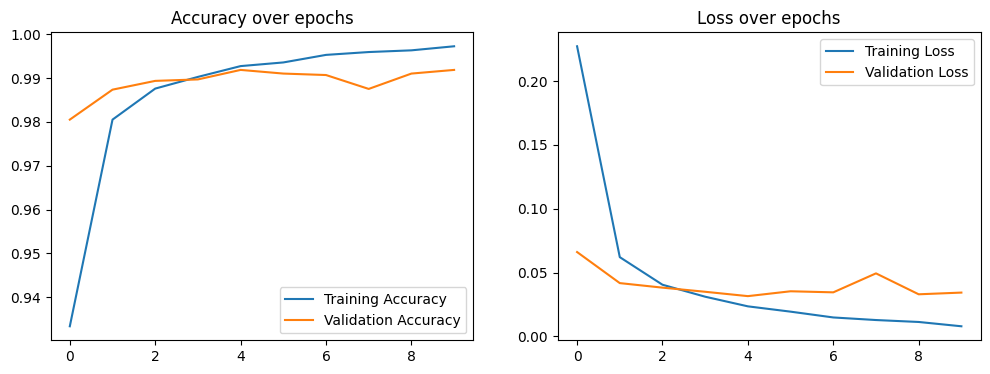

In [6]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

### Step 6: Make Predictions on New Images

In [7]:
def predict_digit(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)
    img_array = img_array.reshape(1, 28, 28, 1)
    img_array = img_array.astype('float32') / 255.0
    
    # Make prediction
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)
    
    # Display the image
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()
    
    return predicted_digit, confidence

# Example usage (you would replace with your own image path)
# predicted, confidence = predict_digit('path_to_your_image.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


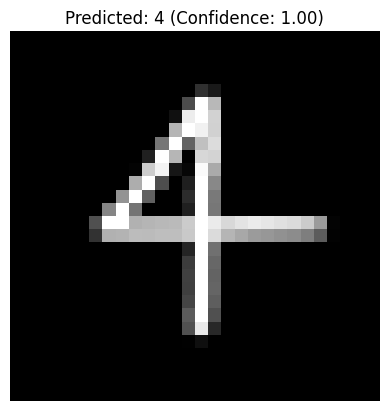

(4, 0.99999225)

In [8]:
predict_digit("/kaggle/input/screenshot-2025-05-12-143514/Screenshot 2025-05-12 143514.png")

In [10]:
# Save the trained model
model.save('mnist_digit_recognizer.h5')  # Saves as HDF5 file

# Optional: Save in TensorFlow SavedModel format (creates a directory)
# model.save('mnist_digit_recognizer')  # No .h5 extension

print("Model saved successfully!")

Model saved successfully!


In [12]:
import os
print("Current directory:", os.getcwd())  # Output: /kaggle/working/
print("Files in working directory:", os.listdir())

Current directory: /kaggle/working
Files in working directory: ['.virtual_documents', 'mnist_digit_recognizer.h5']
